### Explore Bike Share Data

For this project, your goal is to ask and answer three questions about the available bikeshare data from Washington, Chicago, and New York.  This notebook can be submitted directly through the workspace when you are confident in your results.

You will be graded against the project [Rubric](https://review.udacity.com/#!/rubrics/2508/view) by a mentor after you have submitted.  To get you started, you can use the template below, but feel free to be creative in your solutions!

#### Read Data and install Libraries

In [33]:
#Reading the data and changing any blanks with NA's
ny = read.csv('new_york_city.csv', na.strings=c("","NA"))
wash = read.csv('washington.csv', na.strings=c("","NA"))
chi = read.csv('chicago.csv', na.strings=c("","NA"))

In [34]:
#Installing ggplot
library(ggplot2)

In [35]:
#Checking dataframes 
head(ny)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998
4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981
2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987
3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986
6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992
1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986


In [37]:
head(wash)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type
1621326,2017-06-21 08:36:34,2017-06-21 08:44:43,489.066,14th & Belmont St NW,15th & K St NW,Subscriber
482740,2017-03-11 10:40:00,2017-03-11 10:46:00,402.549,Yuma St & Tenley Circle NW,Connecticut Ave & Yuma St NW,Subscriber
1330037,2017-05-30 01:02:59,2017-05-30 01:13:37,637.251,17th St & Massachusetts Ave NW,5th & K St NW,Subscriber
665458,2017-04-02 07:48:35,2017-04-02 08:19:03,1827.341,Constitution Ave & 2nd St NW/DOL,M St & Pennsylvania Ave NW,Customer
1481135,2017-06-10 08:36:28,2017-06-10 09:02:17,1549.427,Henry Bacon Dr & Lincoln Memorial Circle NW,Maine Ave & 7th St SW,Subscriber
1148202,2017-05-14 07:18:18,2017-05-14 07:24:56,398.000,1st & K St SE,Eastern Market Metro / Pennsylvania Ave & 7th St SE,Subscriber


In [38]:
head(chi)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
1423854,2017-06-23 15:09:32,2017-06-23 15:14:53,321,Wood St & Hubbard St,Damen Ave & Chicago Ave,Subscriber,Male,1992
955915,2017-05-25 18:19:03,2017-05-25 18:45:53,1610,Theater on the Lake,Sheffield Ave & Waveland Ave,Subscriber,Female,1992
9031,2017-01-04 08:27:49,2017-01-04 08:34:45,416,May St & Taylor St,Wood St & Taylor St,Subscriber,Male,1981
304487,2017-03-06 13:49:38,2017-03-06 13:55:28,350,Christiana Ave & Lawrence Ave,St. Louis Ave & Balmoral Ave,Subscriber,Male,1986
45207,2017-01-17 14:53:07,2017-01-17 15:02:01,534,Clark St & Randolph St,Desplaines St & Jackson Blvd,Subscriber,Male,1975
1473887,2017-06-26 09:01:20,2017-06-26 09:11:06,586,Clinton St & Washington Blvd,Canal St & Taylor St,Subscriber,Male,1990


In [39]:
#checking rows and columns for each data frame
dim(ny)

[1] 54770     9

In [40]:
dim(wash)

[1] 89051     7

In [41]:
dim(chi)

[1] 8630    9

#### Data Wrangling
Manipulating data for to make it easier to work with.

In [4]:
#Adding a new column: Location and filling the data with the default location
ny$Location <- 'New York'
wash$Location <- 'Washington'
chi$Location <- 'Chicago'

In [5]:
#Inserting all data frames into list
df_list <- list(ny, wash, chi)

#merge all data frames in list and setting it as a new dataframe
bikeshare_master = Reduce(function(x, y) merge(x, y, all=TRUE), df_list)

In [42]:
#checking new dataframe
head(bikeshare_master)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Location,Gender,Birth.Year
7,2017-01-01 00:11:00,2017-01-01 00:14:00,200.077,Adams Mill & Columbia Rd NW,Calvert St & Woodley Pl NW,Subscriber,Washington,NA,NA
13,2017-01-01 00:16:00,2017-01-01 00:26:00,600.116,Prince St & Union St,King St Metro South,Subscriber,Washington,NA,NA
21,2017-01-01 00:23:00,2017-01-01 00:32:00,543.776,New Hampshire Ave & T St NW,11th & O St NW,Subscriber,Washington,NA,NA
36,2017-01-01 00:40:14,2017-01-01 00:46:32,378.000,Ritchie Ct & Banks St,Clark St & Lincoln Ave,Subscriber,Chicago,Male,1964
47,2017-01-01 00:17:01,2017-01-01 00:32:20,919.000,W 27 St & 7 Ave,E 17 St & Broadway,Customer,New York,NA,NA
61,2017-01-01 00:52:00,2017-01-01 00:57:00,274.500,14th St & New York Ave NW,12th & L St NW,Subscriber,Washington,NA,NA


In [43]:
#checking new dimensions
dim(bikeshare_master)

[1] 152451     10

### Question 1


What is the average trip duration for each location?

#### New York

In [50]:
#Summary Statistics: Trip Duration (in minutes) sorted by Location
by(bikeshare_master$Trip.Duration/60, bikeshare_master$Location, summary)

bikeshare_master$Location: Chicago
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
   1.000    6.571   11.167   15.620   18.650 1423.467 
------------------------------------------------------------ 
bikeshare_master$Location: New York
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max.      NA's 
    1.017     6.133    10.167    15.060    17.517 18143.900         1 
------------------------------------------------------------ 
bikeshare_master$Location: Washington
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max.      NA's 
    1.005     6.848    11.783    20.566    20.554 15076.523         1 

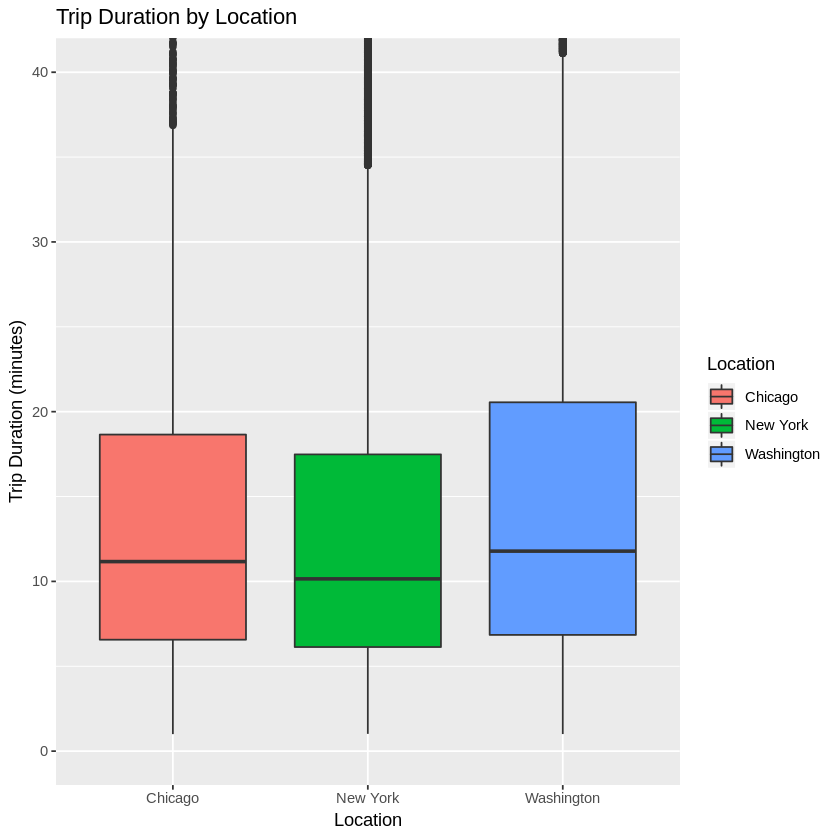

In [10]:
#Trip Duration by Location Box Plot
qplot(x= Location, y = Trip.Duration/60, data =subset(bikeshare_master, !is.na(User.Type)),
      main = 'Trip Duration by Location', 
      xlab = 'Location', 
      ylab = 'Trip Duration (minutes)', 
      fill = Location, 
      geom = 'boxplot')+    
    coord_cartesian(ylim = c(0,40)) #limits outliers based on IQR

### Question 1 Summary

- Manipulated Trip Duration to represented minutes for legibility purposes (minutes are easier to understand than seconds). 
- Average (mean) Trip duration for each location is as follows:
    
    `Washington: 20.566 minutes`, `Chicago: 15.62 minutes`, `New York: 15.06 minutes`
    
- Box plots show that the data is skewed right so the median would be the best measure of center for this data. 
- Median Trip Duration for each location are as follows:
    
    `Washington: 11.783 minutes`, `Chicago: 11.167 minutes`, `New York: 10.167 minutes`
- Washington users had the greatest mean and median followed by Chicago and New York.

### Question 2

What is the most common user type for each location?

#### New York

In [49]:
#Summary Statistics: User Counts sorted by User Type and Location

by(bikeshare_master$User.Type, bikeshare_master$Location, summary)

bikeshare_master$Location: Chicago
  Customer Subscriber       NA's 
      1746       6883          1 
------------------------------------------------------------ 
bikeshare_master$Location: New York
  Customer Subscriber       NA's 
      5558      49093        119 
------------------------------------------------------------ 
bikeshare_master$Location: Washington
  Customer Subscriber       NA's 
     23450      65600          1 

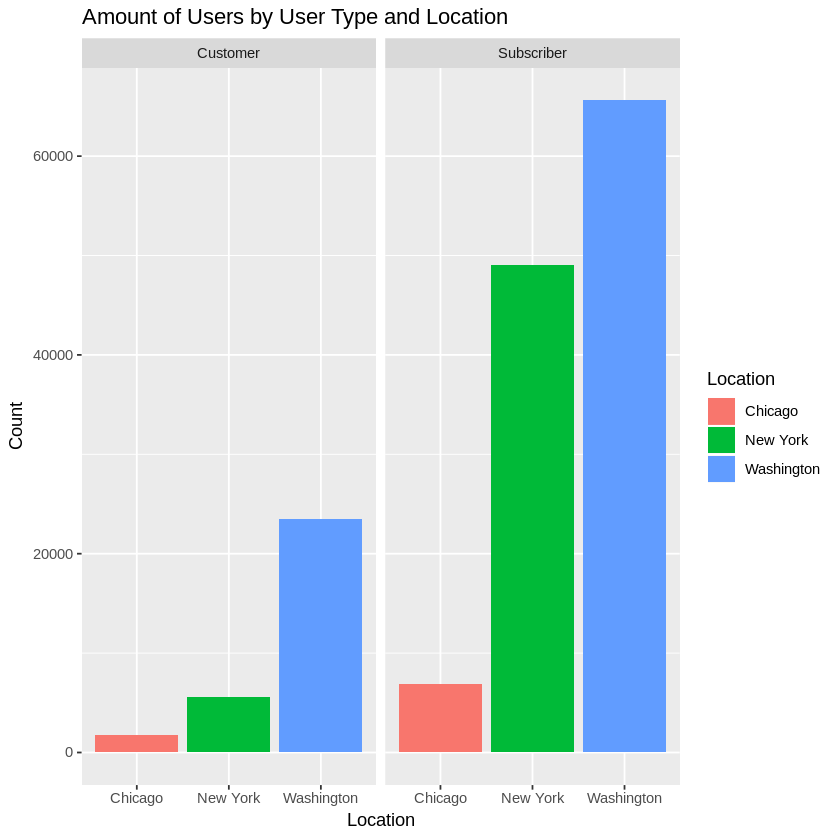

In [46]:
#Amount of Users by User Type and Location Visualization (ignoring NA's)
qplot(x=Location, data =subset(bikeshare_master, !is.na(User.Type)), 
      main = 'Amount of Users by User Type and Location', 
      xlab = 'Location', 
      ylab = 'Count',
      fill = Location,
      geom = 'bar') +
      facet_wrap(~User.Type)

### Question 2 Summary

- Washington has the most users of the three locations and Chicago has the least. 
- Washington has around 9x the amount of subscribers and 13x the amount of standard customers that Chicago does. 
- New York has around 7x the amount of subscribers and 3x the amount of standard customers that Chicago does. 
- The percentage of users that are standard customers is around 20% for Chicago and 26% for Washington but only 10% for New York

### Question 3

What is the most common user by gender for each location?

In [47]:
#Summary Statistics: User Counts sorted by Gender and Location
by(bikeshare_master$Gender, bikeshare_master$Location, summary)

bikeshare_master$Location: Chicago
Female   Male   NA's 
  1723   5159   1748 
------------------------------------------------------------ 
bikeshare_master$Location: New York
Female   Male   NA's 
 12159  37201   5410 
------------------------------------------------------------ 
bikeshare_master$Location: Washington
Female   Male   NA's 
     0      0  89051 

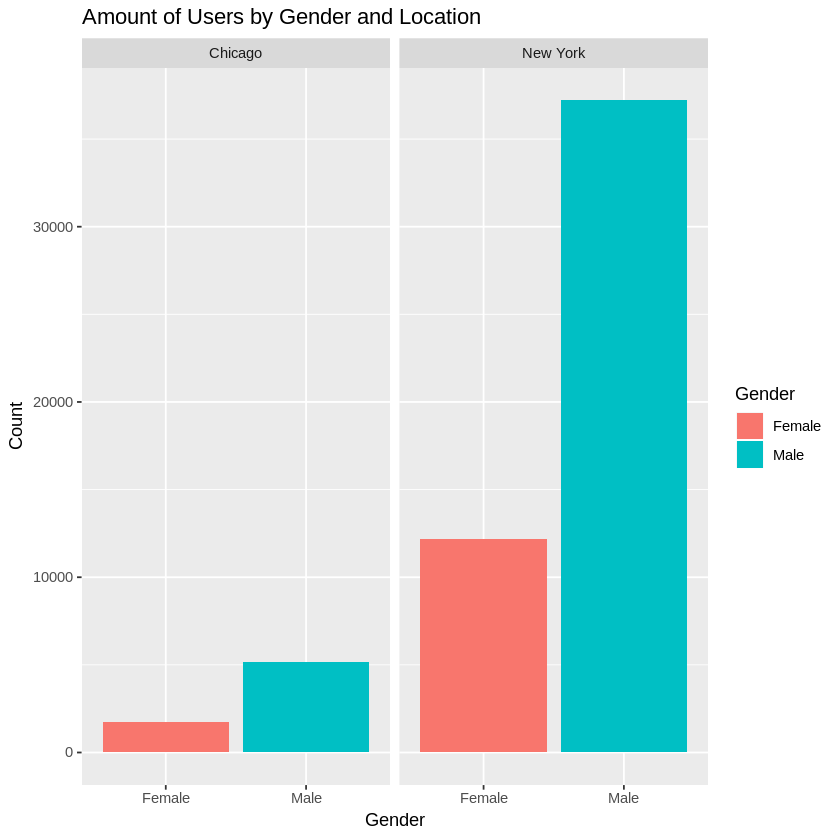

In [48]:
#Amount of Users by Gender and Location Visualization (ignoring NA's)
qplot(x=Gender, data =subset(bikeshare_master, !is.na(Gender)),
      main = 'Amount of Users by Gender and Location', 
      xlab = 'Gender', 
      ylab = 'Count', 
      geom = 'bar', 
      fill = Gender)+ 
    facet_wrap(~Location)

### Question 3 Summary

- Males make up the majority of gender-identified users for both New York and Chicago.
- For both Chicago and New York males users outpace female users at a ratio of around 3:1.
- There is a large number of gender NA's for Chicago relative to sample size.

#### Sources:
    Merging data frames: https://www.statology.org/merge-multiple-data-frames-in-r/

In [53]:
system('python -m nbconvert Explore_bikeshare_data.ipynb')